# Airbnb EDA

## Goal
The main focus of this EDA is to understand which neighbourhood has the most expensive airbnbs

### 1- Import libraries and load data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import folium

In [3]:
listings = pd.read_csv('data/airbnb_nyc.csv', delimiter=',')

In [8]:
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


### 3- Check dataset info

#### Using df.shape we can quickly see that this data set has a total of 30179 rows and 81 columns

In [12]:
listings.shape

(30179, 81)

#### df.info() provides more information such as the data types and a non-null count that indicates if there are missing values. This is good for a general idea if there are a lot of missing data points in a specific column.

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

#### df.columns lists the names of all columns so it is easier to find variables of interest for analysis

In [25]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


### 3- EDA

In [65]:
#Created new df "var_select" containing selected variables of interest
var_select = listings[['neighbourhood', 'latitude', 'longitude', 'price', 'number_of_reviews', 'review_scores_rating', 'room_type', 'balcony', 'nature_and_views']].copy()
var_select

,neighbourhood,latitude,longitude,price,number_of_reviews,review_scores_rating,room_type,balcony,nature_and_views
0,Brooklyn,40.64749,-73.97237,149,9,98.0,Private room,-1,-1
1,Harlem,40.80902,-73.94190,150,0,NaN,Private room,-1,-1
2,Harlem,40.79685,-73.94872,190,0,NaN,Entire home/apt,-1,-1
3,Brooklyn,40.65599,-73.97519,60,19,97.0,Private room,-1,-1
4,Manhattan,40.86754,-73.92639,80,0,NaN,Private room,-1,-1
...,...,...,...,...,...,...,...,...,...
30174,Jamaica,40.69137,-73.80844,65,0,NaN,Private room,-1,-1
30175,Bedford-Stuyvesant,40.67853,-73.94995,70,0,NaN,Private room,-1,-1
30176,Brooklyn,40.70184,-73.93317,40,0,NaN,Private room,-1,-1
30177,Hell's Kitchen,40.75751,-73.99112,55,0,NaN,Shared room,-1,-1


In [66]:
#checking for null values
var_select.isnull().sum()

neighbourhood              9
latitude                   0
longitude                  0
price                      0
number_of_reviews          0
review_scores_rating    9085
room_type                  0
balcony                    0
nature_and_views           0
dtype: int64

In [67]:
#replacing na values in neighbourhood with Not Specified
var_select['neighbourhood'].fillna('Not Specified', inplace=True)

#### Around 30% of the listings have null review_scores_rating. In this case, I believe it's not beneficial to fill in those values with 0 or a mean, so I will drop this column enterely from the df

In [68]:
var_select.drop(['review_scores_rating'], axis=1, inplace=True)
var_select

,neighbourhood,latitude,longitude,price,number_of_reviews,room_type,balcony,nature_and_views
0,Brooklyn,40.64749,-73.97237,149,9,Private room,-1,-1
1,Harlem,40.80902,-73.94190,150,0,Private room,-1,-1
2,Harlem,40.79685,-73.94872,190,0,Entire home/apt,-1,-1
3,Brooklyn,40.65599,-73.97519,60,19,Private room,-1,-1
4,Manhattan,40.86754,-73.92639,80,0,Private room,-1,-1
...,...,...,...,...,...,...,...,...
30174,Jamaica,40.69137,-73.80844,65,0,Private room,-1,-1
30175,Bedford-Stuyvesant,40.67853,-73.94995,70,0,Private room,-1,-1
30176,Brooklyn,40.70184,-73.93317,40,0,Private room,-1,-1
30177,Hell's Kitchen,40.75751,-73.99112,55,0,Shared room,-1,-1


In [69]:
#check nulls again
var_select.isnull().sum()

neighbourhood        0
latitude             0
longitude            0
price                0
number_of_reviews    0
room_type            0
balcony              0
nature_and_views     0
dtype: int64

In [70]:
#check df statistics using df.describe()
var_select.describe()

,latitude,longitude,price,number_of_reviews,balcony,nature_and_views
count,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,40.728593,-73.952292,132.949965,4.459889,-0.898075,-0.984294
std,0.054541,0.044117,93.151824,5.265633,0.439850,0.176542
min,40.499790,-74.244420,0.000000,0.000000,-1.000000,-1.000000
25%,40.690720,-73.982085,65.000000,0.000000,-1.000000,-1.000000
50%,40.721450,-73.955280,100.000000,2.000000,-1.000000,-1.000000
75%,40.762790,-73.936435,175.000000,7.000000,-1.000000,-1.000000
max,40.913060,-73.716900,500.000000,20.000000,1.000000,1.000000


In [44]:
#there is at least one listing priced at 0 so this should be removed
var_select = var_select.loc[var_select['price'] > 0]

#### Now lets use graphs to visualize the data

In [48]:
#nice map of NYC

mean_lat = var_select['latitude'].mean()
mean_long = var_select['longitude'].mean()
nyc_map = folium.Map(location = [mean_lat, mean_long], tiles = "OpenStreetMap", zoom_start = 9)
#nyc_map

Text(0.5, 0, 'Price')

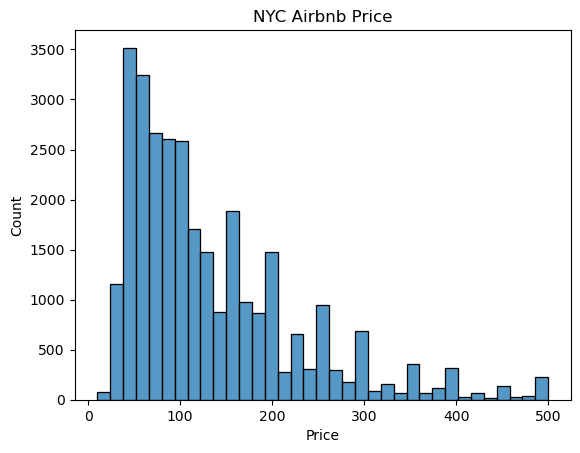

In [52]:
sns.histplot(data=var_select, x='price', binwidth=14)
plt.title("NYC Airbnb Price")
plt.xlabel("Price")

Text(0.5, 0, 'number_of_reviews')

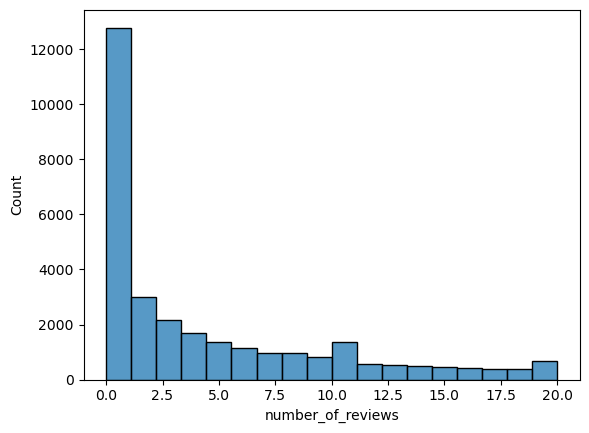

In [57]:
sns.histplot(data=var_select, x='number_of_reviews', bins=18)
plt.xlabel('number_of_reviews')

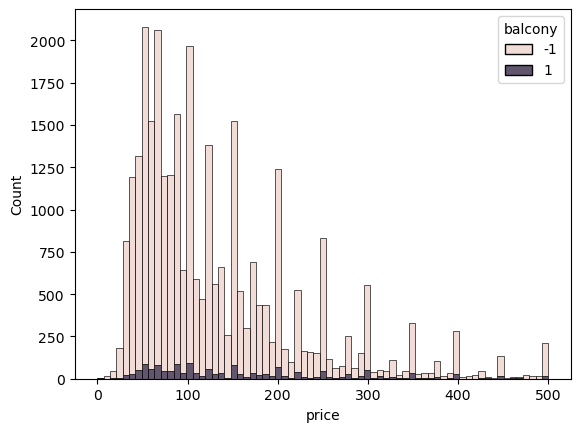

In [71]:
sns.histplot(data=listings, x="price", hue="balcony", multiple="stack")

Text(0, 0.5, 'Price')

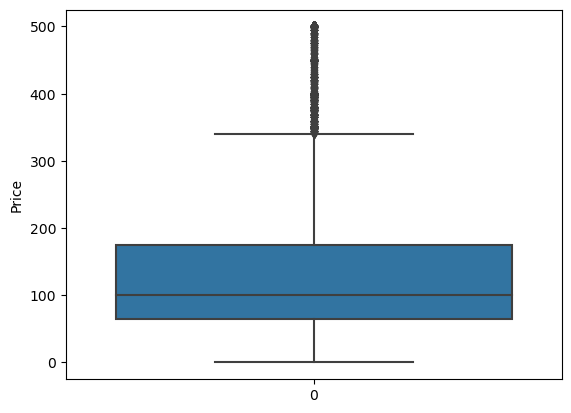

In [73]:
sns.boxplot(data=var_select['price'])
plt.ylabel("Price")
#there seem to be a lot of outliers above 300 dollars. Seems left skewed.

Text(0, 0.5, 'Number of Reviews')

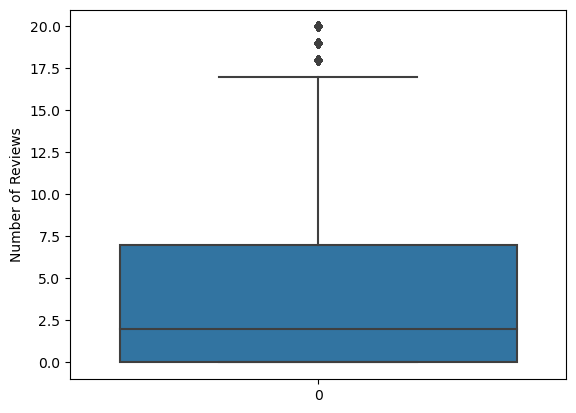

In [54]:
sns.boxplot(data=var_select['number_of_reviews'])
plt.ylabel("Number of Reviews")
#small amount of outliers above 17.5. Also left skewed.

In [111]:
ndf=var_select[['neighbourhood']]

In [122]:
#create df with top 5 neighbourhood counts
top_neighborhoods = ndf['neighbourhood'].value_counts().nlargest(5).index.tolist()
df_top = ndf[ndf['neighbourhood'].isin(top_neighborhoods)]
df_top

,neighbourhood
0,Brooklyn
3,Brooklyn
4,Manhattan
6,Brooklyn
8,Brooklyn
...,...
30166,Brooklyn
30169,Manhattan
30170,Brooklyn
30175,Bedford-Stuyvesant


[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Williamsburg'),
 Text(4, 0, 'Bedford-Stuyvesant')]

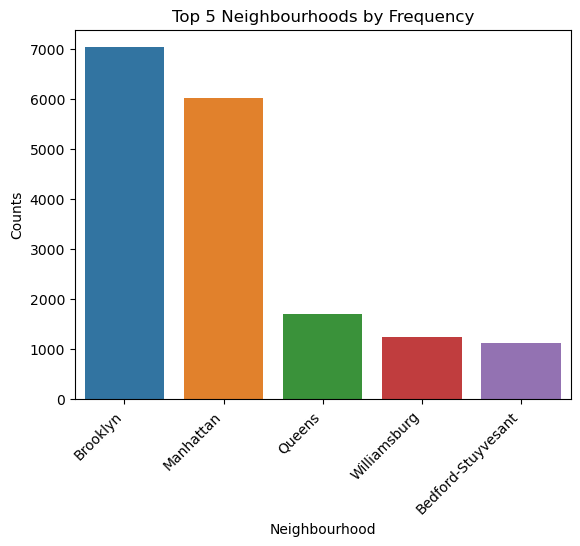

In [153]:
%matplotlib inline
nplot= sns.countplot(data=df_top, x='neighbourhood')
plt.title('Top 5 Neighbourhoods by Frequency')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
nplot.set_xticklabels(nplot.get_xticklabels(), rotation=45, ha="right")

In [152]:
top5_df = var_select.loc[var_select['neighbourhood'].isin(top_neighborhoods)]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

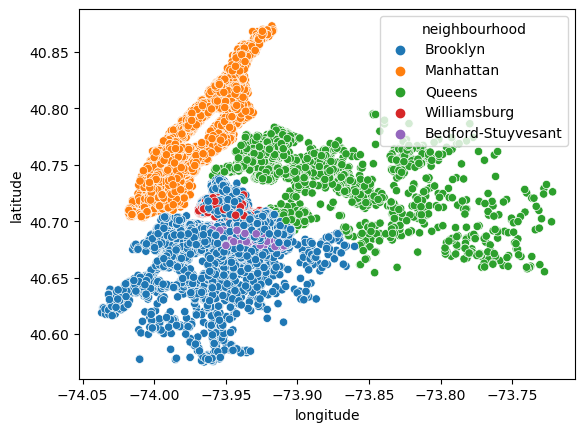

In [151]:
%matplotlib inline
sns.scatterplot(data=top5_df, x='longitude', y='latitude', hue='neighbourhood')

In [155]:
neighbourhood_freq = var_select['neighbourhood'].value_counts()
freq_dict = dict(neighbourhood_freq)
var_select['neighbourhood_freq'] = var_select['neighbourhood'].map(freq_dict)

var_select

,neighbourhood,latitude,longitude,price,number_of_reviews,room_type,balcony,nature_and_views,neighbourhood_freq
0,Brooklyn,40.64749,-73.97237,149,9,Private room,-1,-1,7024
1,Harlem,40.80902,-73.94190,150,0,Private room,-1,-1,981
2,Harlem,40.79685,-73.94872,190,0,Entire home/apt,-1,-1,981
3,Brooklyn,40.65599,-73.97519,60,19,Private room,-1,-1,7024
4,Manhattan,40.86754,-73.92639,80,0,Private room,-1,-1,6022
...,...,...,...,...,...,...,...,...,...
30174,Jamaica,40.69137,-73.80844,65,0,Private room,-1,-1,190
30175,Bedford-Stuyvesant,40.67853,-73.94995,70,0,Private room,-1,-1,1134
30176,Brooklyn,40.70184,-73.93317,40,0,Private room,-1,-1,7024
30177,Hell's Kitchen,40.75751,-73.99112,55,0,Shared room,-1,-1,309


In [138]:
price_neighb_freq = var_select[['price', 'neighbourhood_freq']]
price_neighb_freq.corr()

#there's no correlation between the number of listings available in a specific neighbourhood and listing price

,price,neighbourhood_freq
price,1.000000,0.012722
neighbourhood_freq,0.012722,1.000000


#### Which is the neighbourhood with the highest average price?

In [156]:
neighborhood_avg_price = var_select.groupby('neighbourhood')['price'].mean()
avg_price_dict = dict(neighborhood_avg_price)
var_select['neighbourhood_avg_price'] = var_select['neighbourhood'].map(avg_price_dict)

var_select

,neighbourhood,latitude,longitude,price,number_of_reviews,room_type,balcony,nature_and_views,neighbourhood_freq,neighbourhood_avg_price
0,Brooklyn,40.64749,-73.97237,149,9,Private room,-1,-1,7024,111.548405
1,Harlem,40.80902,-73.94190,150,0,Private room,-1,-1,981,110.247706
2,Harlem,40.79685,-73.94872,190,0,Entire home/apt,-1,-1,981,110.247706
3,Brooklyn,40.65599,-73.97519,60,19,Private room,-1,-1,7024,111.548405
4,Manhattan,40.86754,-73.92639,80,0,Private room,-1,-1,6022,168.384590
...,...,...,...,...,...,...,...,...,...,...
30174,Jamaica,40.69137,-73.80844,65,0,Private room,-1,-1,190,102.215789
30175,Bedford-Stuyvesant,40.67853,-73.94995,70,0,Private room,-1,-1,1134,92.804233
30176,Brooklyn,40.70184,-73.93317,40,0,Private room,-1,-1,7024,111.548405
30177,Hell's Kitchen,40.75751,-73.99112,55,0,Shared room,-1,-1,309,196.750809


In [168]:
highest_avg_price = neighborhood_avg_price.max()
highest_avg_price

257.72727272727275

In [167]:
highest_avg_price_neighborhood = neighborhood_avg_price.idxmax()
highest_avg_price_neighborhood

'Noho'

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

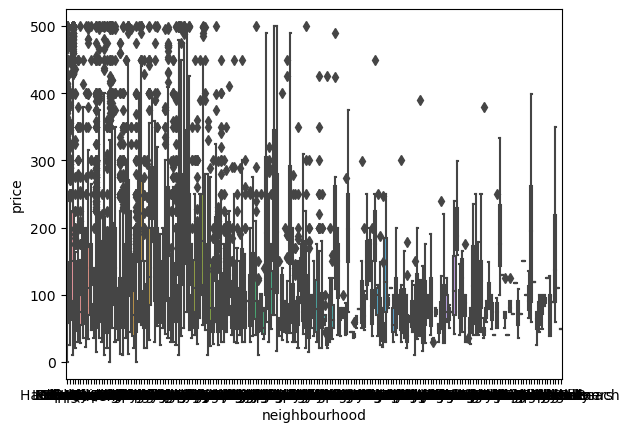

In [160]:
sns.boxplot(data=var_select, x='neighbourhood', y='price')